### stationary ts
The observations in a stationary time series are not dependent on time. Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations. When a time series
is stationary, it can be easier to model.

### Attribute of seasonal ts
Summary statistics like the __mean and variance do change over time__, providing a drift in the concepts a model may try to capture. Classical time series analysis and forecasting methods are concerned with making non-stationary time series data stationary by identifying and removing trends and removing seasonal effects.

### Types of stationary ts

Stationary Process: A process that generates a stationary series of observations.
- Stationary Model: A model that describes a stationary series of observations.
- Trend Stationary: A time series that does not exhibit a trend.
- Seasonal Stationary: A time series that does not exhibit seasonality.
- Strictly Stationary: A mathematical definition of a stationary process, speciffically that the joint distribution of observations is invariant to time shift.

If we fit a stationary model to data, we assume our data are a realization of a stationary process. So our first step in an analysis should be to check whether there is any evidence of a trend or seasonal effects and, if there is, remove them.


## Check for stationary

- Look at Plots
- Summary Statistics
- Statistical Tests


# Summary Statistics

In [5]:
import pandas as pd
births = pd.read_csv(r"./Datasets/daily-total-female-births.csv",index_col=0)

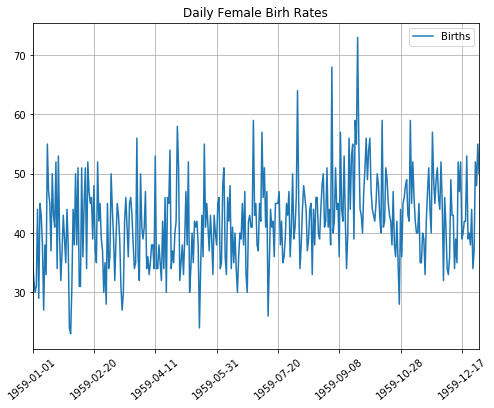

In [15]:
_ = births.plot(figsize=(8,6),rot=40,grid=True).set(title='Daily Female Birh Rates',xlabel='')

In [55]:
def sample_stats(df):
    """split data frame in two equal samples and return stats"""
    sample_one = df.sample(frac=.5)
    sample_two = df[~df.index.isin(sample_one.index)]
    stats = pd.concat([sample_one.describe(),sample_two.describe()],axis=1,sort=False)
    stats.columns = ['Sample1','Sample2']
    return stats,sample_one,sample_two

          Sample1     Sample2
count  182.000000  183.000000
mean    41.736264   42.224044
std      7.430466    7.277775
min     23.000000   27.000000
25%     36.000000   38.000000
50%     41.000000   42.000000
75%     46.000000   46.000000
max     64.000000   73.000000


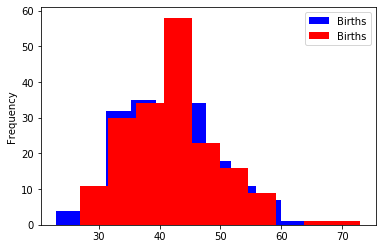

In [64]:
stats,sam1,sam2 = sample_stats(births) # on each call the samples will be different
print(stats)
ax= sam1.plot.hist(color='b')
sam2.plot.hist(color='r',ax=ax)

In [65]:
airline = pd.read_csv(r"./Datasets/airline-passengers.csv",index_col=0)

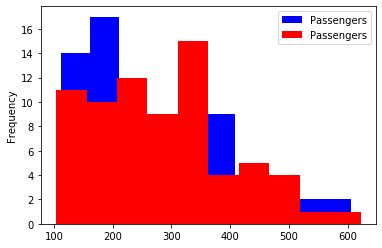

In [90]:
stats,sam1,sam2 = sample_stats(airline)
stats # compared to births data the std is quite variable and mean
ax= sam1.plot.hist(color='b')
sam2.plot.hist(color='r',ax=ax)

## Augmented Dickey-Fuller test

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test1. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

It uses an autoregressive model and optimizes an information criterion across multiple different lag values. The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

- __Null Hypothesis (H0)__: Fail to reject, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
- __Alternate Hypothesis (H1)__: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

__Criteria__ :

- __p-value > 0.05:__ Fail to reject the null hypothesis ($H_0$), the data has a unit root and is non-stationary.
- __p-value <= 0.05:__ Reject the null hypothesis ($H_0$), the data does not have a unit root and is stationary.

In [97]:
from statsmodels.tsa.stattools import adfuller
birth_adf = adfuller(births)
print ("ADF birth\n",birth_adf)
print("Ho is rejected. Birth Rate series is stationary\n")

birth_airline = adfuller(airline)
print ("ADF  airline\n",birth_airline)
print("Ho is not rejected. Airline passenger series is non-stationary\n")

birth_airline = adfuller(pd.np.log(airline))
print ("ADF  for log-airline\n",birth_airline)
print("Ho is not rejected. Airline passenger series is non-stationary\n")

ADF birth
 (-4.808291253559764, 5.2434129901498554e-05, 6, 358, {'1%': -3.448748905151901, '5%': -2.8696473721448728, '10%': -2.5710891239349585}, 2343.8290926464197)
Ho is rejected. Birth Rate series is stationary

ADF  airline
 (0.8153688792060512, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
Ho is not rejected. Airline passenger series is non-stationary

ADF  for log-airline
 (-1.717017089106961, 0.4223667747703911, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -445.3990312497209)
Ho is not rejected. Airline passenger series is non-stationary



## Summary
- The importance of time series data being stationary for use with statistical modeling methods and even some modern machine learning methods.
- How to use line plots and basic summary statistics to check if a time series is stationary.
- How to calculate and interpret statistical significance tests to check if a time series is stationary.